## 6.10 Homework

The goal of this homework is to create a tree-based regression model for prediction apartment prices (column `'price'`).

In this homework we'll again use the New York City Airbnb Open Data dataset - the same one we used in homework 2 and 3.

You can take it from [Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv)
or download from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv)
if you don't want to sign up to Kaggle.

Let's load the data:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import xgboost as xgb

In [2]:
columns = [
    'neighbourhood_group',
    'room_type',
    'latitude',
    'longitude',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365',
    'price'
]

df = pd.read_csv('AB_NYC_2019.csv', usecols=columns)
df.reviews_per_month = df.reviews_per_month.fillna(0)

In [3]:
df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


* Apply the log tranform to `price`
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1

In [4]:
X = df.drop('price', axis=1)
y = np.log1p(df.price)

X_f, X_test, y_f, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

x_train, x_val, y_train, y_val = train_test_split(X_f, y_f, test_size=0.25, random_state=1)

In [5]:
x_train

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
385,Queens,40.76434,-73.92132,Entire home/apt,4,30,0.32,1,363
33147,Brooklyn,40.73442,-73.95854,Private room,5,2,0.16,1,0
33881,Brooklyn,40.66359,-73.99487,Entire home/apt,1,33,2.75,5,113
37208,Brooklyn,40.63766,-74.02626,Private room,3,1,0.12,2,362
7485,Brooklyn,40.65118,-74.00842,Private room,2,0,0.00,2,365
...,...,...,...,...,...,...,...,...,...
2738,Brooklyn,40.69332,-73.96543,Entire home/apt,12,11,0.15,1,15
25619,Manhattan,40.71856,-73.98753,Private room,4,0,0.00,1,0
40278,Queens,40.69034,-73.84611,Private room,3,0,0.00,2,178
17605,Manhattan,40.76324,-73.98459,Entire home/apt,10,1,0.03,1,0


In [6]:
y_train

385      4.709530
33147    4.262680
33881    6.133398
37208    4.605170
7485     7.601402
           ...   
2738     4.653960
25619    4.248495
40278    3.931826
17605    5.525453
22406    5.393628
Name: price, Length: 29337, dtype: float64

Now, use `DictVectorizer` to turn train and validation into matrices:

In [7]:
dv = DictVectorizer(sparse=False)

train_dict = x_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = x_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

## Question 1

Let's train a decision tree regressor to predict the price variable. 

* Train a model with `max_depth=1`

In [8]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [9]:
print(export_text(dt, feature_names= dv.get_feature_names()))

|--- room_type=Entire home/apt <= 0.50
|   |--- value: [4.29]
|--- room_type=Entire home/apt >  0.50
|   |--- value: [5.15]



C:\Users\Rohan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[Text(167.4, 163.07999999999998, 'room_type=Entire home/apt <= 0.5\nsquared_error = 0.485\nsamples = 29337\nvalue = 4.739'),
 Text(83.7, 54.360000000000014, 'squared_error = 0.284\nsamples = 14041\nvalue = 4.292'),
 Text(251.10000000000002, 54.360000000000014, 'squared_error = 0.319\nsamples = 15296\nvalue = 5.149')]

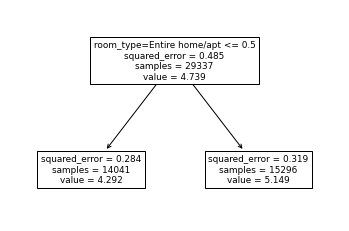

In [10]:
tree.plot_tree(dt, feature_names= dv.get_feature_names())

Which feature is used for splitting the data?

* `room_type`
* `neighbourhood_group`
* `number_of_reviews`
* `reviews_per_month`

### Answer 1
**`room_type=Entire home/apt`**

## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1`  (optional - to make training faster)

In [11]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

What's the RMSE of this model on validation?

* 0.059
* 0.259
* 0.459
* 0.659

In [12]:
y_pred = rf.predict(X_val)
rmse = mean_squared_error(y_val, y_pred, squared=False)

print('Root Mean Squared Error: ', rmse)

Root Mean Squared Error:  0.4615632303514057


### Answer 2
**`Root Mean Squared Error:  0.4615632303514057`**

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10
* Set `random_state` to `1`
* Evaluate the model on the validation dataset

In [13]:
scores = []
start, stop, step = 10, 200, 10
for n_estimator in range(start, stop, step):
    rf = RandomForestRegressor(n_estimators=n_estimator, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    scores.append((n_estimator, round(rmse, 3)))

In [14]:
scores_df = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])
scores_df

,n_estimators,rmse
0,10,0.462
1,20,0.448
2,30,0.446
3,40,0.444
4,50,0.442
5,60,0.442
6,70,0.441
7,80,0.441
8,90,0.441
9,100,0.440


After which value of `n_estimators` does RMSE stop improving?

- 10
- 50
- 70
- 120

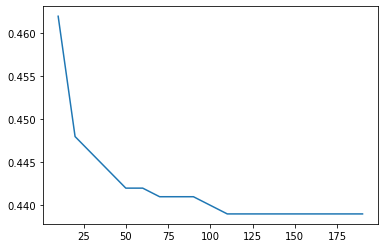

In [15]:
plt.plot(scores_df.n_estimators, scores_df.rmse)

### Answer 3
**`n_estimators = 50`**

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values, try different values of `n_estimators` from 10 till 200 (with step 10)
* Fix the random seed: `random_state=1`

In [16]:
score = []
max_depth = [10, 15, 20, 25]

for i in max_depth:
    start, stop, step = 10, 200, 10
    
    for n_estimator in range(start, stop, step):
        rf = RandomForestRegressor(max_depth=i,
                                   n_estimators=n_estimator,
                                   random_state=1,
                                   n_jobs=-1
                                  )
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        score.append((i, n_estimator, round(rmse, 3)))

In [17]:
score_df = pd.DataFrame(score, columns=['max_depth', 'n_estimators', 'rmse'])
score_df

,max_depth,n_estimators,rmse
0,10,10,0.446
1,10,20,0.442
2,10,30,0.441
3,10,40,0.441
4,10,50,0.441
...,...,...,...
71,25,150,0.439
72,25,160,0.439
73,25,170,0.439
74,25,180,0.439


In [18]:
score_df.iloc[np.where(score_df.rmse == score_df.rmse.min())]['max_depth']

29    15
30    15
31    15
32    15
33    15
34    15
35    15
36    15
37    15
Name: max_depth, dtype: int64

What's the best `max_depth`:

* 10
* 15
* 20
* 25

Bonus question (not graded):

Will the answer be different if we change the seed for the model?

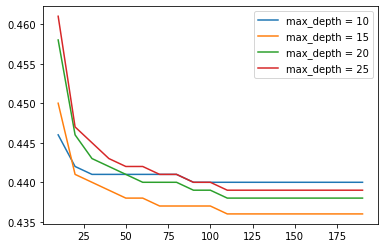

In [19]:
for d in max_depth:
    df_subset = score_df[score_df.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.rmse, label=f'max_depth = {d}')
    
plt.legend()

### Answer 4
* Best **`max_depth`** = **`15`**
* Yes, the result if we change the seed for the model changes.

## Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorith, it finds the best split. 
When doint it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the imporatant features 
for tree-based models.

In Scikit-Learn, tree-based models contain this information in the `feature_importances_` field. 

For this homework question, we'll find the most important feature:

* Train the model with these parametes:
    * `n_estimators=10`,
    * `max_depth=20`,
    * `random_state=1`,
    * `n_jobs=-1` (optional)
* Get the feature importance information from this model

In [20]:
ensem = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
ensem.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [21]:
imp_dict = {'features': dv.get_feature_names_out(), 'importance':ensem.feature_importances_}
imp_df = pd.DataFrame(imp_dict)
imp_df

,features,importance
0,availability_365,0.076264
1,calculated_host_listings_count,0.030102
2,latitude,0.152775
3,longitude,0.154101
4,minimum_nights,0.053252
5,neighbourhood_group=Bronx,0.000265
6,neighbourhood_group=Brooklyn,0.000966
7,neighbourhood_group=Manhattan,0.034047
8,neighbourhood_group=Queens,0.001166
9,neighbourhood_group=Staten Island,0.000084


What's the most important feature? 

* `neighbourhood_group=Manhattan`
* `room_type=Entire home/apt`	
* `longitude`
* `latitude`

In [22]:
imp_df[imp_df.importance == imp_df.importance.max()]['features']

12    room_type=Entire home/apt
Name: features, dtype: object

### Answer 5
Most important feature : **`room_type=Entire home/apt`**

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

In [23]:
features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [24]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

watchlist = [(dtrain, 'train'), (dval, 'validation')]

model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist)

[0]	train-rmse:3.02752	validation-rmse:3.02415
[1]	train-rmse:2.14667	validation-rmse:2.14390
[2]	train-rmse:1.53878	validation-rmse:1.53721
[3]	train-rmse:1.12557	validation-rmse:1.12523
[4]	train-rmse:0.85100	validation-rmse:0.85174
[5]	train-rmse:0.67490	validation-rmse:0.67752
[6]	train-rmse:0.56687	validation-rmse:0.57148
[7]	train-rmse:0.50448	validation-rmse:0.51139
[8]	train-rmse:0.46913	validation-rmse:0.47777
[9]	train-rmse:0.45009	validation-rmse:0.45965
[10]	train-rmse:0.43912	validation-rmse:0.44981
[11]	train-rmse:0.43327	validation-rmse:0.44475
[12]	train-rmse:0.42936	validation-rmse:0.44210
[13]	train-rmse:0.42668	validation-rmse:0.44038
[14]	train-rmse:0.42463	validation-rmse:0.43943
[15]	train-rmse:0.42259	validation-rmse:0.43827
[16]	train-rmse:0.42113	validation-rmse:0.43772
[17]	train-rmse:0.42074	validation-rmse:0.43787
[18]	train-rmse:0.41896	validation-rmse:0.43744
[19]	train-rmse:0.41812	validation-rmse:0.43726
[20]	train-rmse:0.41716	validation-rmse:0.43691
[2

In [25]:
y_pred = model.predict(dval)

In [26]:
rmse = mean_squared_error(y_val, y_pred, squared=False)
rmse

0.43621034591295677

Now change `eta` first to `0.1` and then to `0.01`

In [27]:
# eta = 0.1

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

watchlist = [(dtrain, 'train'), (dval, 'validation')]

model1 = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist)

[0]	train-rmse:3.87217	validation-rmse:3.86889
[1]	train-rmse:3.49150	validation-rmse:3.48840
[2]	train-rmse:3.14949	validation-rmse:3.14635
[3]	train-rmse:2.84232	validation-rmse:2.83951
[4]	train-rmse:2.56650	validation-rmse:2.56412
[5]	train-rmse:2.31905	validation-rmse:2.31692
[6]	train-rmse:2.09714	validation-rmse:2.09526
[7]	train-rmse:1.89834	validation-rmse:1.89663
[8]	train-rmse:1.72033	validation-rmse:1.71878
[9]	train-rmse:1.56120	validation-rmse:1.55976
[10]	train-rmse:1.41910	validation-rmse:1.41786
[11]	train-rmse:1.29248	validation-rmse:1.29149
[12]	train-rmse:1.17977	validation-rmse:1.17907
[13]	train-rmse:1.07974	validation-rmse:1.07936
[14]	train-rmse:0.99113	validation-rmse:0.99118
[15]	train-rmse:0.91299	validation-rmse:0.91348
[16]	train-rmse:0.84421	validation-rmse:0.84524
[17]	train-rmse:0.78390	validation-rmse:0.78525
[18]	train-rmse:0.73111	validation-rmse:0.73308
[19]	train-rmse:0.68507	validation-rmse:0.68776
[20]	train-rmse:0.64528	validation-rmse:0.64883
[2

In [28]:
y_pred1 = model1.predict(dval)
rmse = mean_squared_error(y_val, y_pred1, squared=False)
rmse

0.43249655247991464

In [29]:
# eta = 0.01

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

watchlist = [(dtrain, 'train'), (dval, 'validation')]

model2 = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist)

[0]	train-rmse:4.25336	validation-rmse:4.25010
[1]	train-rmse:4.21141	validation-rmse:4.20815
[2]	train-rmse:4.16988	validation-rmse:4.16661
[3]	train-rmse:4.12877	validation-rmse:4.12551
[4]	train-rmse:4.08807	validation-rmse:4.08481
[5]	train-rmse:4.04779	validation-rmse:4.04454
[6]	train-rmse:4.00792	validation-rmse:4.00467
[7]	train-rmse:3.96845	validation-rmse:3.96521
[8]	train-rmse:3.92937	validation-rmse:3.92615
[9]	train-rmse:3.89070	validation-rmse:3.88749
[10]	train-rmse:3.85242	validation-rmse:3.84921
[11]	train-rmse:3.81452	validation-rmse:3.81133
[12]	train-rmse:3.77701	validation-rmse:3.77382
[13]	train-rmse:3.73988	validation-rmse:3.73671
[14]	train-rmse:3.70313	validation-rmse:3.69996
[15]	train-rmse:3.66674	validation-rmse:3.66359
[16]	train-rmse:3.63073	validation-rmse:3.62759
[17]	train-rmse:3.59508	validation-rmse:3.59195
[18]	train-rmse:3.55979	validation-rmse:3.55666
[19]	train-rmse:3.52487	validation-rmse:3.52175
[20]	train-rmse:3.49030	validation-rmse:3.48719
[2

In [30]:
y_pred2 = model2.predict(dval)
rmse = mean_squared_error(y_val, y_pred2, squared=False)
rmse

1.630452438951798

What's the best eta?

* 0.3
* 0.1
* 0.01

### Answer 6
best **`eta`** = **`0.1`**

## Submit the results


Submit your results here: https://forms.gle/wQgFkYE6CtdDed4w8

It's possible that your answers won't match exactly. If it's the case, select the closest one.


## Deadline


The deadline for submitting is 20 October 2021, 17:00 CET (Wednesday). After that, the form will be closed.

